There is a big difference between the distance from my face to the average distance from my classmates' faces, because the average distance takes into account all of the pixels, while in my face, there are some pixels that are much lighter or darker than others.

I believe that the correct way to measure this error is by calculating the distance between the pixels

In [61]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg
from pathlib import Path
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

In [62]:
def image_convert2(filename,folder1,Folder2):
        img=Image.open(os.path.join(folder1, filename))
        img = img.convert("L")
        img = img.resize((256, 256))
        # img.save(os.path.join(Folder2, filename))
        img.save(os.path.join(Folder2, filename), format='JPEG')
        # img = mpimg.imread(os.path.join(Folder2, filename))
        img = mpimg.imread(os.path.join(Folder2, filename), format='jpeg')
        return img

In [63]:
def image_convert(img):
    img = img.convert("L")
    img = img.resize((256, 256))
    return img

In [64]:
def plot_image(img_arr):
    plt.imshow(img_arr,cmap='gray')
    plt.show()

In [65]:
def avr_images(list,x_dim,y_dim):
    final_img=np.empty((256,256))
    for x in range(x_dim):
        for y in range(y_dim):
            px1=0
            for img in list:
                px1=px1+img[x][y]
            final_img[x][y]=px1/len(img)
    return final_img

In [66]:
# Autenticación
gauth = GoogleAuth()
gauth.LocalWebserverAuth()
drive = GoogleDrive(gauth)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=141426482649-1jivhu3osji9p763t9vpt3ddqvlgnsf9.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [67]:

folder_id = '1f1aZ4i1lYsRaW9ID76iHfGztKdmAsg21'

query = f"'{folder_id}' in parents and trashed = false"
file_list = drive.ListFile({'q': query}).GetList()


if not os.path.exists('images'):
    os.makedirs('images')

for file in file_list:
    if 'image' in file['mimeType']: # Download just pictures
        file.GetContentFile(os.path.join('images', file['title']))

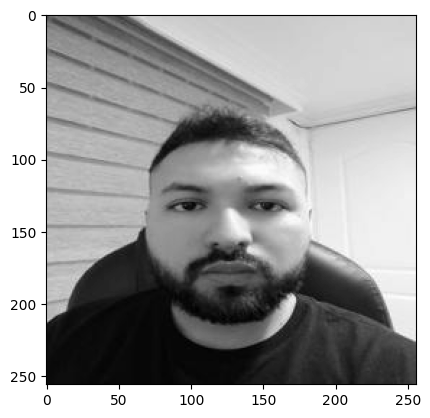

the image's average: 136.56207275390625


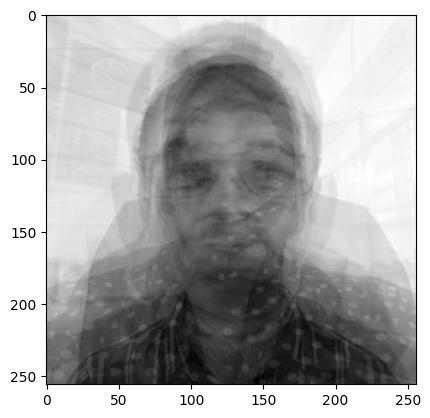

Distant between mi face and my classmates 128.78975814580917


In [68]:
current_path = os.getcwd()
folder1=f"{current_path}\images"
folder2=f"{current_path}\images"
folder3=f"{current_path}\My_image"


images = []
for filename in os.listdir(folder1):
    img=image_convert2(filename,folder1,folder2)
    images.append(img)

new_images=images


my_img=image_convert2('Santiago M.jpeg',folder3,folder3)

avr = np.mean(my_img)
plot_image(my_img)
print("the image's average:", avr)

average_img=avr_images(new_images,256,256)

plot_image(average_img)


print("Distant between mi face and my classmates", (avr-np.average(average_img)))
